In [73]:
from skimage.metrics import normalized_mutual_information
import numpy as np

a = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])
b = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 0]])

normalized_mutual_information(a,b)

np.float64(1.3741489492017618)

In [74]:
hist, bin_edges = np.histogramdd(
    [np.reshape(a,-1), np.reshape(b,-1)],
    density=True,
    #bins=3
)

In [75]:
hist

array([[66.66666667,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [70]:
np.sum(hist, axis=0)

array([66.66666667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 33.33333333])

In [72]:
x = 1/2
x*np.log(x)*2

np.float64(-0.6931471805599453)

## Rigid transfomation

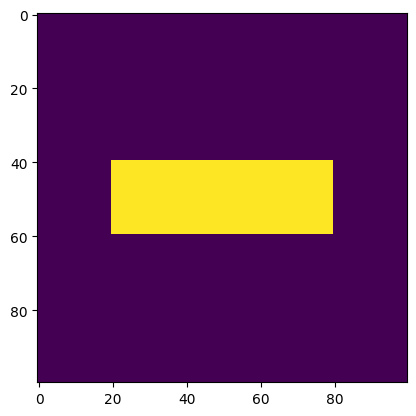

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.transform import EuclideanTransform, warp

# 1. Create a synthetic image
image = np.zeros((100, 100))
image[40:60, 20:80] = 1  # Rectangle

plt.imshow(image)

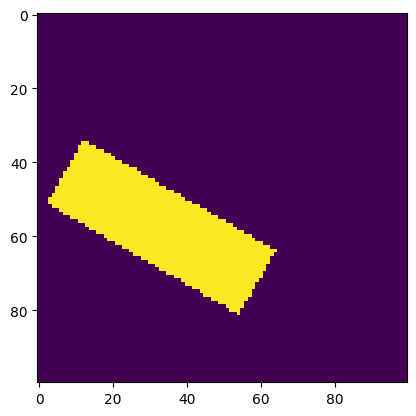

In [81]:

# 2. Apply known Euclidean transform (rotation + translation)
true_rotation = 30  # degrees
true_translation = (15, -10)

transform = EuclideanTransform(
    rotation=np.deg2rad(true_rotation),
    translation=true_translation
)
warped_image = warp(image, transform.inverse, output_shape=(100, 100), order=0)

plt.imshow(warped_image)

In [79]:
# 3. Recover transformation using point correspondences
src = np.array([[20, 40], [80, 40], [80, 60], [20, 60]])  # Original corners
dst = transform(src)  # Transformed corners

estimated_transform = EuclideanTransform()
estimated_transform.estimate(src, dst)
print("Estimated rotation (deg):", np.rad2deg(estimated_transform.rotation))
print("Estimated translation:", estimated_transform.translation)

Estimated rotation (deg): 29.999999999999996
Estimated translation: [ 15. -10.]


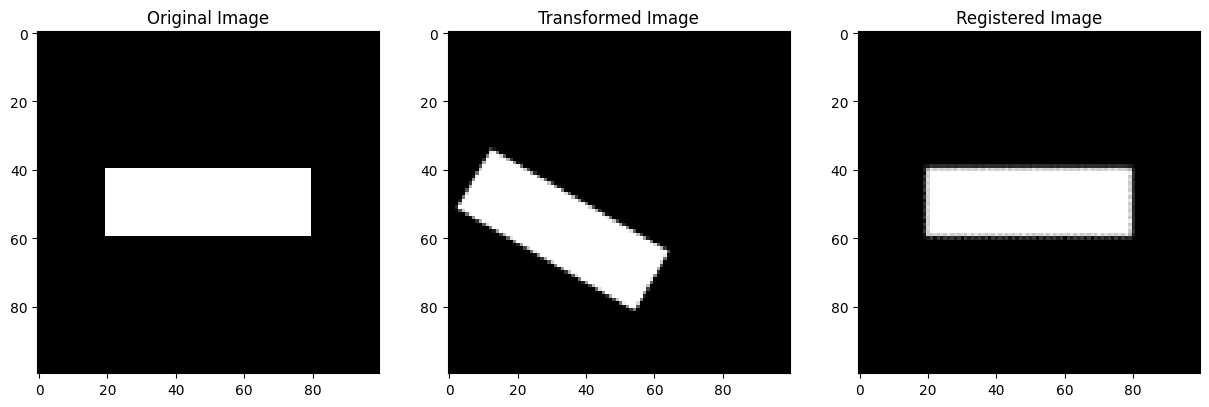

In [80]:

# 4. Apply recovered transform
registered_image = warp(warped_image, estimated_transform, output_shape=(100, 100))

# 5. Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(warped_image, cmap='gray')
axes[1].set_title('Transformed Image')
axes[2].imshow(registered_image, cmap='gray')
axes[2].set_title('Registered Image')
plt.show()

In [82]:
import numpy as np
from skimage.transform import EuclideanTransform

# Define a point in OUTPUT space
point_out = (10, 20)  # We want to fill this pixel

# Our transformation: 30° rotation + (5, 5) translation
transform = EuclideanTransform(rotation=np.deg2rad(30), translation=(5, 5))

# WRONG: Direct transformation (output → ?)
direct_result = transform(point_out)  # This gives (18.66, 24.32) - not in input!

# CORRECT: Use inverse transformation
inverse_result = transform.inverse(point_out)  # Gives (1.34, 12.32) - in input space

Los tratamientos de reirradiación, es decir un segundo curso de irradiación en una misma región anatómica, es cada vez mas frecuente representando estadisticamente el 6% de los tratamientos impartidos en un centro de radioterapia.

Para evaluar la toxicidad en órganos sanos, la metedología empleada más común para cuantificar la dosis compuesta es mediante la suma de dosis equivalente a 2 Gy por fracción (EQD2), voxel a voxel, utilizando un registro rígido de imágenes de tomografía computada. Sin embargo, actualmente algunos sistemas de planeación para tratamiento no cuentan con herramientas que permitan cuantificar la dosis compuesta. 

El lenguaje de programación Python y sus librerías han sido ampliamente utilizadas por la comunidad científica. Para el procesamiento de imágenes es posible utilizar la libreria SimpleITK